## Analysing Middle Overs Batting of Teams in IPL 2022

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
death_overs_batting = pd.read_csv("project_ipl_2022_death_overs_batting.csv")

In [13]:
death_overs_batting.head()

,Team,Team_shortform,M,I,R,B,Outs,Avg,SR,HS,4s,6s,BPW,BPB,Normalized Avg,Normalized SR,Normalized BPW,Normalized BPB,Total Normalized Score
0,Chennai Super Kings,CSK,14,14,613,384,35,17.51,159.64,83,42,36,10.97,4.92,13.55,49.351,9.67,100.000,43.144
1,Delhi Capitals,DC,13,13,590,349,21,28.10,169.05,70,40,42,16.62,4.26,100.00,92.996,100.00,17.422,77.604
2,Gujarat Titans,GT,16,16,763,455,31,24.61,167.69,70,62,39,14.68,4.50,71.51,86.688,68.95,48.232,68.844
3,IPL,IPL,74,74,1966,1188,87,22.60,165.50,88,144,117,13.66,4.55,55.08,76.476,52.60,54.023,59.545
4,Kolkata Knight Riders,KKR,12,12,503,311,30,16.77,161.74,74,39,34,10.37,4.26,7.51,59.091,0.00,17.939,21.135


In [14]:
colors = []
# Iterate over rows of middle_overs_batting
for idx, row in death_overs_batting.iterrows():
    if row['Team_shortform'] == "CSK" :
        colors.append('yellow')
    elif row['Team_shortform'] == "RCB" :
        colors.append('green')
    elif row['Team_shortform'] == "RR" :
        colors.append('deeppink')
    elif row["Team_shortform"] == "DC":
        colors.append('royalblue')
    elif row["Team_shortform"] == "GT":
        colors.append("mediumpurple")
    elif row["Team_shortform"] == 'PBKS':
        colors.append('red')
    elif row["Team_shortform"] == "KKR":
        colors.append('purple')
    elif row["Team_shortform"] == "LSG":
        colors.append('skyblue')
    elif row["Team_shortform"] == "SRH":
        colors.append("orange")
    elif row["Team_shortform"] == "MI":
        colors.append('blue')
    else:
        colors.append('grey')
print(colors)

['yellow', 'royalblue', 'mediumpurple', 'grey', 'purple', 'skyblue', 'blue', 'red', 'deeppink', 'green', 'orange']


## Finding Which team has more Avearge Runs Per Wicket in IPL 2022 Death Overs (16-20 Overs)

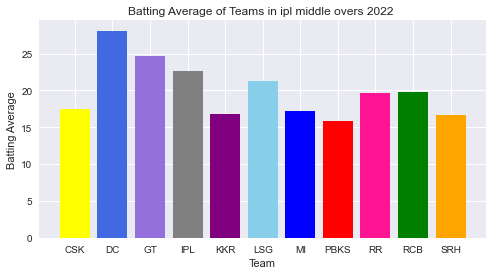

In [15]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(8,4))
x = death_overs_batting["Team_shortform"]
y = death_overs_batting["Avg"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Batting Average of Teams in ipl middle overs 2022 ")
plt.xlabel("Team")
plt.ylabel("Batting Average")
plt.show()

## Finding Which team has batted Aggersively(Highest Strike Rate) in IPL 2022 Death Overs (16-20 Overs)

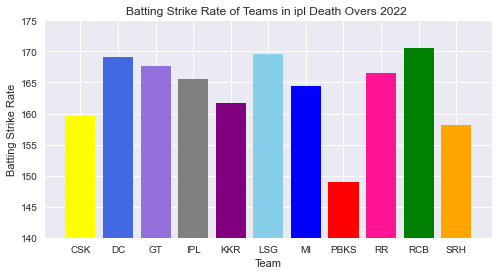

In [19]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(8,4))
x = death_overs_batting["Team_shortform"]
y = death_overs_batting["SR"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Batting Strike Rate of Teams in ipl Death Overs 2022 ")
plt.xlabel("Team")
plt.ylabel("Batting Strike Rate")
plt.ylim(140,175)
plt.show()

## Finding Which team has taking less balls to hit a boundary in IPL 2022 Death Overs phase(16-20 Overs)

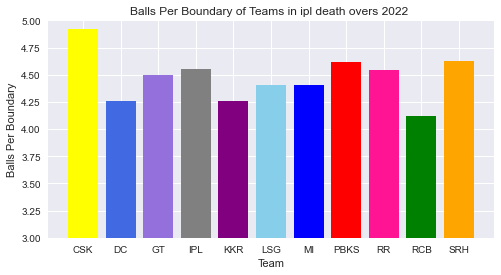

In [22]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(8,4))
x = death_overs_batting["Team_shortform"]
y = death_overs_batting["BPB"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Balls Per Boundary of Teams in ipl death overs 2022 ")
plt.xlabel("Team")
plt.ylabel("Balls Per Boundary")
plt.ylim(3,5)
plt.show()

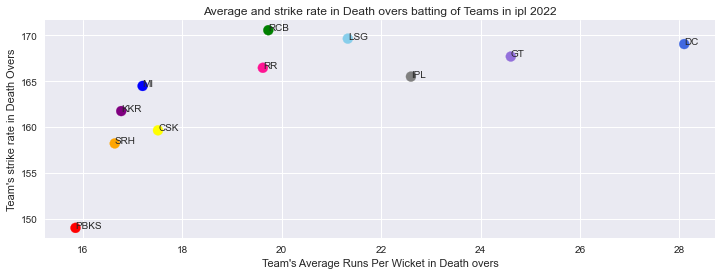

In [24]:
# create scatter plot for Teams Average and strikerate in middle overs batting
plt.style.use("seaborn")
fig = plt.figure(figsize=(12,4))
x = death_overs_batting["Avg"]
y = death_overs_batting["SR"]
plt.scatter(x,y,c=colors,s=100)
plt.title("Average and strike rate in Death overs batting of Teams in ipl 2022")
plt.xlabel("Team's Average Runs Per Wicket in Death overs")
plt.ylabel("Team's strike rate in Death Overs")
for i, label in enumerate(death_overs_batting['Team_shortform']):
    plt.annotate(label,(x[i], y[i]))
plt.show()

## K-Means Clustering on Teams Batting in Death Overs

In [26]:
X = death_overs_batting.iloc[:, [7,8]].values

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


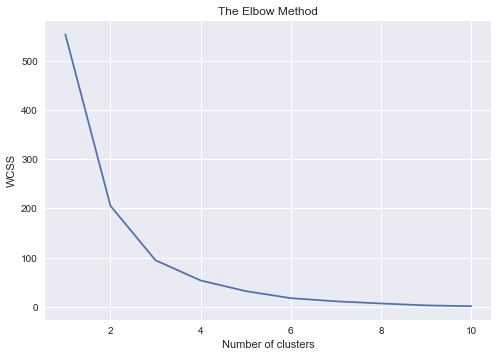

In [27]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

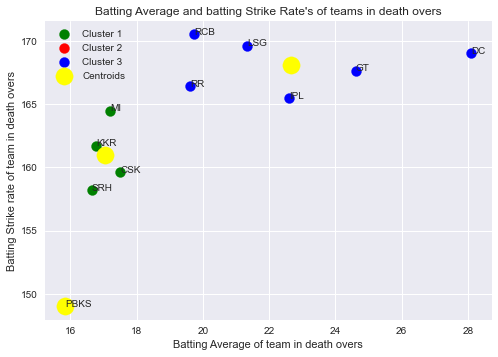

In [31]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'red', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title("Batting Average and batting Strike Rate's of teams in death overs")
plt.xlabel("Batting Average of team in death overs")
plt.ylabel('Batting Strike rate of team in death overs')
for i, label in enumerate(death_overs_batting['Team_shortform']):
    plt.annotate(label,(x[i], y[i]))
plt.legend()
plt.show()

In [32]:
kmeans.labels_ 

array([0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 0])

In [34]:
death_overs_batting['Cluster_on_avg_str'] = kmeans.labels_

In [35]:
cluster_3_teams = death_overs_batting[death_overs_batting['Cluster_on_avg_str'] == 2]

In [37]:
cluster_3_teams.head(6)

,Team,Team_shortform,M,I,R,B,Outs,Avg,SR,HS,4s,6s,BPW,BPB,Normalized Avg,Normalized SR,Normalized BPW,Normalized BPB,Total Normalized Score,Cluster_on_avg_str
1,Delhi Capitals,DC,13,13,590,349,21,28.10,169.05,70,40,42,16.62,4.26,100.00,92.996,100.00,17.422,77.604,2
2,Gujarat Titans,GT,16,16,763,455,31,24.61,167.69,70,62,39,14.68,4.50,71.51,86.688,68.95,48.232,68.844,2
3,IPL,IPL,74,74,1966,1188,87,22.60,165.50,88,144,117,13.66,4.55,55.08,76.476,52.60,54.023,59.545,2
5,Lucknow Super Giants,LSG,14,14,704,415,33,21.33,169.64,88,48,46,12.58,4.41,44.73,95.733,35.33,37.082,53.220,2
8,Rajasthan Royals,RR,17,17,824,495,42,19.62,166.46,73,55,54,11.79,4.54,30.78,80.983,22.70,52.730,46.796,2
9,Royal Challengers Bangalore,RCB,16,16,730,428,37,19.73,170.56,84,59,45,11.57,4.12,31.67,100.000,19.21,0.000,37.720,2


In [38]:
cluster_2_teams = death_overs_batting[death_overs_batting['Cluster_on_avg_str'] == 1]

In [39]:
cluster_2_teams.head()

,Team,Team_shortform,M,I,R,B,Outs,Avg,SR,HS,4s,6s,BPW,BPB,Normalized Avg,Normalized SR,Normalized BPW,Normalized BPB,Total Normalized Score,Cluster_on_avg_str
7,Punjab Kings,PBKS,14,14,523,351,33,15.85,149.0,67,42,34,10.64,4.62,0.0,0.0,4.31,62.281,16.649,1


In [40]:
cluster_1_teams = death_overs_batting[death_overs_batting['Cluster_on_avg_str'] == 0]

In [41]:
cluster_1_teams.head()

,Team,Team_shortform,M,I,R,B,Outs,Avg,SR,HS,4s,6s,BPW,BPB,Normalized Avg,Normalized SR,Normalized BPW,Normalized BPB,Total Normalized Score,Cluster_on_avg_str
0,Chennai Super Kings,CSK,14,14,613,384,35,17.51,159.64,83,42,36,10.97,4.92,13.55,49.351,9.67,100.000,43.144,0
4,Kolkata Knight Riders,KKR,12,12,503,311,30,16.77,161.74,74,39,34,10.37,4.26,7.51,59.091,0.00,17.939,21.135,0
6,Mumbai Indians,MI,13,13,602,366,35,17.20,164.48,76,43,40,10.46,4.41,11.02,71.800,1.45,36.431,30.175,0
10,Sunrisers Hyderabad,SRH,13,13,549,347,33,16.64,158.21,72,44,31,10.52,4.63,6.45,42.718,2.37,63.302,28.711,0


## Clustering Of Players in IPL Death Overs Batting 2022

In [42]:
death_overs_batters = pd.read_csv("project_ipl_2022_death_overs_players_batting.csv")

In [43]:
death_overs_batters.head()

,Player,Team_shortform,I,R,B,Outs,Avg,SR,HS,4s,...,50,100,BPW,BPB,Normalized Avg,Normalized SR,Normalized BPW,Normalized BPB,Normalized Matches,Total Normalized Score
0,TH David,MI,6,147,62,4,36.75,237.10,44,9,...,0,0,15.50,2.82,21.46,100.00,6.19,0.00,20.0,65.60
1,KD Karthik,RCB,13,251,121,3,83.67,207.44,53,19,...,1,0,40.33,3.18,62.29,74.38,27.08,8.22,90.0,63.77
2,AR Patel,DC,6,127,70,0,127.00,181.43,33,8,...,0,0,127.00,4.38,100.00,51.92,100.00,34.95,20.0,60.65
3,JC Buttler,RR,7,174,78,5,34.80,223.08,52,11,...,1,0,15.60,3.00,19.76,87.89,6.27,4.08,30.0,58.91
4,AK Markram,SRH,6,111,53,2,55.50,209.43,32,8,...,0,0,26.50,3.53,37.78,76.10,15.44,16.05,20.0,56.60


In [44]:
colors = []
# Iterate over rows of death_overs_batters
for idx, row in death_overs_batters.iterrows():
    if row['Team_shortform'] == "CSK" :
        colors.append('yellow')
    elif row['Team_shortform'] == "RCB" :
        colors.append('green')
    elif row['Team_shortform'] == "RR" :
        colors.append('deeppink')
    elif row["Team_shortform"] == "DC":
        colors.append('blue')
    elif row["Team_shortform"] == "GT":
        colors.append("mediumpurple")
    elif row["Team_shortform"] == 'PBKS':
        colors.append('red')
    elif row["Team_shortform"] == "KKR":
        colors.append('purple')
    elif row["Team_shortform"] == "LSG":
        colors.append('skyblue')
    elif row["Team_shortform"] == "SRH":
        colors.append("orange")
    elif row["Team_shortform"] == "MI":
        colors.append('blue')
    else:
        colors.append('grey')
print(colors)

['blue', 'green', 'blue', 'deeppink', 'orange', 'blue', 'deeppink', 'skyblue', 'purple', 'mediumpurple', 'mediumpurple', 'orange', 'purple', 'yellow', 'skyblue', 'blue', 'orange', 'skyblue', 'yellow', 'blue', 'deeppink', 'mediumpurple', 'blue', 'red']


## Player's Average Runs per wicket in Death Overs Batting in IPL 2022(with min 50 balls faced)

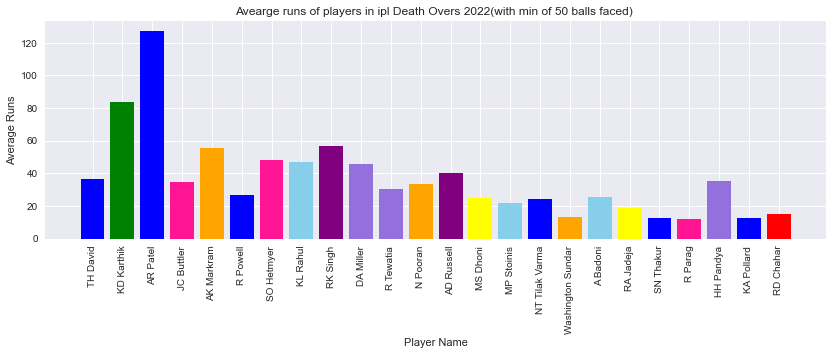

In [46]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(14,4))
x = death_overs_batters["Player"]
y = death_overs_batters["Avg"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Avearge runs of players in ipl Death Overs 2022(with min of 50 balls faced) ")
plt.xlabel("Player Name")
plt.ylabel("Average Runs")
plt.xticks(rotation=90)
plt.show()

## Player's Strike Rate in Death overs Batting in ipl 2022 (with min 50 balls faced)

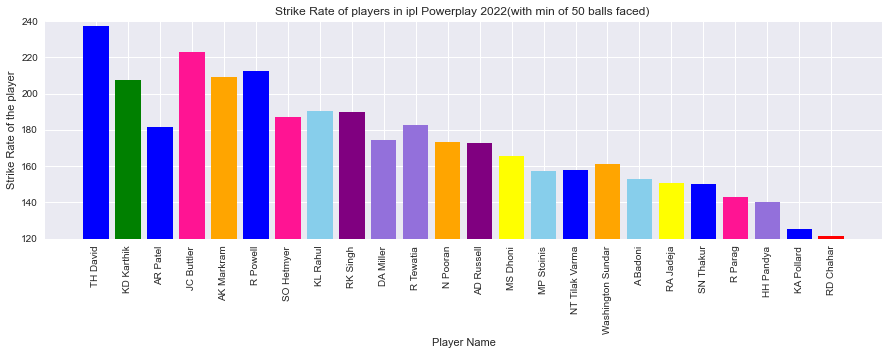

In [49]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(15,4))
x = death_overs_batters["Player"]
y = death_overs_batters["SR"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Strike Rate of players in ipl Powerplay 2022(with min of 50 balls faced) ")
plt.xlabel("Player Name",)
plt.ylabel("Strike Rate of the player")
plt.xticks(rotation=90)
plt.ylim(120,240)
plt.show()

## Player's Balls Per Boundary in ipl Death overs batting 2022 (with min 50 balls faced)

Boundaries are really important in Powerplay to win the matches and to score fastly using filed restrictions for teams 
batting

Balls Per Boundary = How many balls will the batter will take to hit a boundary 

Lesser the value more is the boundary % of the player

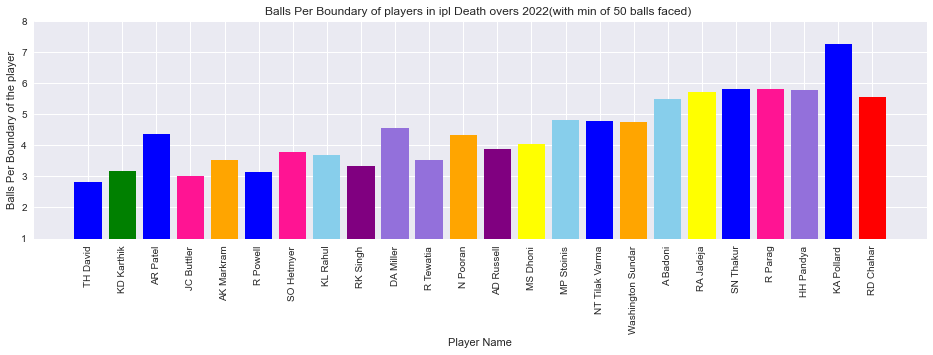

In [53]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(16,4))
x = death_overs_batters["Player"]
y = death_overs_batters["BPB"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Balls Per Boundary of players in ipl Death overs 2022(with min of 50 balls faced) ")
plt.xlabel("Player Name")
plt.ylabel("Balls Per Boundary of the player")
plt.xticks(rotation=90)
plt.ylim(1,8)
plt.show()

## Players Average And Strike Rate in Death Overs Batting in ipl 2022( with 50 balls faced)

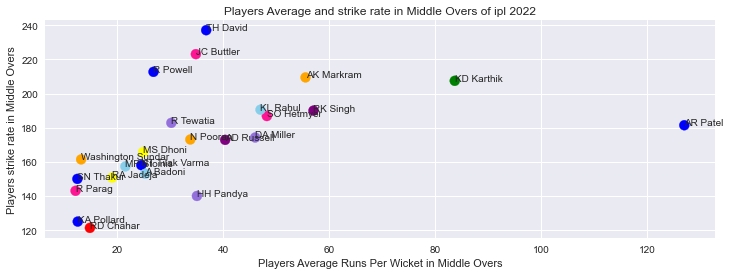

In [55]:
# create scatter plot for Players Average and strikerate in middle overs batting
plt.style.use("seaborn")
fig = plt.figure(figsize=(12,4))
x = death_overs_batters["Avg"]
y = death_overs_batters["SR"]
plt.scatter(x,y,c=colors,s=100)
plt.title("Players Average and strike rate in Middle Overs of ipl 2022")
plt.xlabel("Players Average Runs Per Wicket in Middle Overs")
plt.ylabel("Players strike rate in Middle Overs")
for i, label in enumerate(death_overs_batters['Player']):
    plt.annotate(label,(x[i], y[i]))
plt.show()

## Clustering The players in Death Overs batting IPL 2022 (with min 50 balls faced )

## K-Means Clustering on Players Batting in Death overs in IPL 2022

In [57]:
X = death_overs_batters.iloc[:, [19,7]].values

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


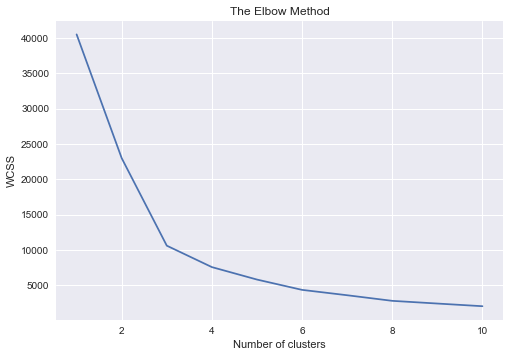

In [58]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [59]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

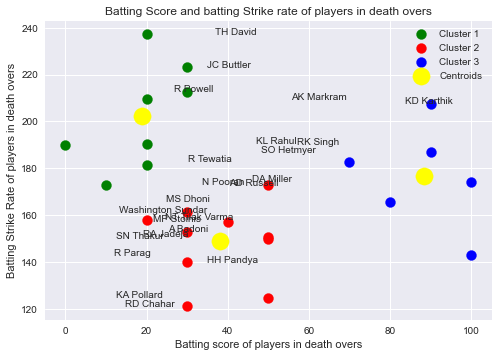

In [60]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'red', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title("Batting Score and batting Strike rate of players in death overs")
plt.xlabel("Batting score of players in death overs")
plt.ylabel('Batting Strike Rate of players in death overs')
for i, label in enumerate(death_overs_batters['Player']):
    plt.annotate(label,(x[i], y[i]))
plt.legend()
plt.show()

In [61]:
kmeans.labels_ 

array([0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1])

In [62]:
death_overs_batters['Cluster_on_avg_str'] = kmeans.labels_

In [63]:
# These Players have performed well in death overs batting this year with high score and high str
cluster_1_players = death_overs_batters[death_overs_batters['Cluster_on_avg_str'] == 0]

In [64]:
cluster_1_players.head(20)

,Player,Team_shortform,I,R,B,Outs,Avg,SR,HS,4s,...,100,BPW,BPB,Normalized Avg,Normalized SR,Normalized BPW,Normalized BPB,Normalized Matches,Total Normalized Score,Cluster_on_avg_str
0,TH David,MI,6,147,62,4,36.75,237.10,44,9,...,0,15.50,2.82,21.46,100.00,6.19,0.00,20.0,65.60,0
2,AR Patel,DC,6,127,70,0,127.00,181.43,33,8,...,0,127.00,4.38,100.00,51.92,100.00,34.95,20.0,60.65,0
3,JC Buttler,RR,7,174,78,5,34.80,223.08,52,11,...,0,15.60,3.00,19.76,87.89,6.27,4.08,30.0,58.91,0
4,AK Markram,SRH,6,111,53,2,55.50,209.43,32,8,...,0,26.50,3.53,37.78,76.10,15.44,16.05,20.0,56.60,0
5,R Powell,DC,7,134,63,5,26.80,212.70,48,6,...,0,12.60,3.15,12.80,78.93,3.75,7.45,30.0,52.35,0
7,KL Rahul,LSG,6,141,74,3,47.00,190.54,36,13,...,0,24.67,3.70,30.38,59.79,13.90,19.80,20.0,45.62,0
8,RK Singh,KKR,4,114,60,2,57.00,190.00,40,12,...,0,30.00,3.33,39.08,59.32,18.39,11.56,0.0,45.49,0
12,AD Russell,KKR,5,121,70,3,40.33,172.86,39,9,...,0,23.33,3.89,24.58,44.52,12.78,24.04,10.0,35.17,0


In [68]:
# These Players have not performed well in death overs batting this year with low score and low str
cluster_2_players = death_overs_batters[death_overs_batters['Cluster_on_avg_str'] == 1]

In [67]:
cluster_2_players.head(20)

,Player,Team_shortform,I,R,B,Outs,Avg,SR,HS,4s,...,100,BPW,BPB,Normalized Avg,Normalized SR,Normalized BPW,Normalized BPB,Normalized Matches,Total Normalized Score,Cluster_on_avg_str
11,N Pooran,SRH,9,135,78,4,33.75,173.08,43,9,...,0,19.50,4.33,18.85,44.71,9.56,34.01,50.0,36.98,1
14,MP Stoinis,LSG,8,129,82,6,21.50,157.32,38,6,...,0,13.67,4.82,8.19,31.10,4.65,45.02,40.0,27.03,1
15,NT Tilak Varma,MI,6,98,62,4,24.50,158.06,30,9,...,0,15.50,4.77,10.80,31.74,6.19,43.80,20.0,26.89,1
16,Washington Sundar,SRH,7,92,57,7,13.14,161.40,40,9,...,0,8.14,4.75,0.91,34.62,0.00,43.37,30.0,26.79,1
17,A Badoni,LSG,7,101,66,4,25.25,153.03,26,6,...,0,16.50,5.50,11.45,27.39,7.03,60.20,30.0,26.60,1
18,RA Jadeja,CSK,9,95,63,5,19.00,150.79,23,6,...,0,12.60,5.73,6.01,25.46,3.75,65.31,50.0,25.70,1
19,SN Thakur,DC,9,87,58,7,12.43,150.00,29,3,...,0,8.29,5.80,0.30,24.78,0.12,66.94,50.0,24.13,1
21,HH Pandya,GT,7,105,75,3,35.00,140.00,26,11,...,0,25.00,5.77,19.94,16.14,14.18,66.25,30.0,22.51,1
22,KA Pollard,MI,9,100,80,8,12.50,125.00,23,4,...,0,10.00,7.27,0.36,3.19,1.56,100.00,50.0,14.56,1
23,RD Chahar,PBKS,7,74,61,5,14.80,121.31,22,7,...,0,12.20,5.55,2.36,0.00,3.41,61.22,30.0,8.26,1


In [69]:
# These Players have performed well in death overs batting this year with high score and good str
cluster_3_players = death_overs_batters[death_overs_batters['Cluster_on_avg_str'] == 2]

In [70]:
cluster_3_players.head(20)

,Player,Team_shortform,I,R,B,Outs,Avg,SR,HS,4s,...,100,BPW,BPB,Normalized Avg,Normalized SR,Normalized BPW,Normalized BPB,Normalized Matches,Total Normalized Score,Cluster_on_avg_str
1,KD Karthik,RCB,13,251,121,3,83.67,207.44,53,19,...,0,40.33,3.18,62.29,74.38,27.08,8.22,90.0,63.77,2
6,SO Hetmyer,RR,13,241,129,5,48.20,186.82,42,15,...,0,25.80,3.79,31.42,56.58,14.86,21.91,90.0,47.66,2
9,DA Miller,GT,14,230,132,5,46.00,174.24,46,17,...,0,26.40,4.55,29.51,45.71,15.36,38.92,100.0,42.99,2
10,R Tewatia,GT,11,181,99,6,30.17,182.83,37,19,...,0,16.50,3.54,15.73,53.13,7.03,16.11,70.0,40.49,2
13,MS Dhoni,CSK,12,174,105,7,24.86,165.71,43,17,...,0,15.00,4.04,11.11,38.35,5.77,27.39,80.0,32.26,2
20,R Parag,RR,14,133,93,11,12.09,143.01,35,8,...,0,8.45,5.81,0.00,18.74,0.26,67.22,100.0,22.98,2
